In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 데이터셋을 train, test 로 분류 
from sklearn.linear_model import LogisticRegression
#LogisticRegression 모델 사용 
from sklearn.metrics import accuracy_score
#정확도 평가
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
#정규화

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=2fee228d30a6344a9fec2a983f0fdb232ad6d44092d8e0485fc81f4eee688bf8
  Stored in directory: c:\users\ad_gu\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [2]:
numble_df = pd.read_csv('C:\\data\\numble4.csv')
numble_df.head()

,결산년월,유동자산,매출채권,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,...,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),총자본회전율(회),매출채권회전율(회),미수금,매출원가,재고자산,폐업_유무
0,20211231,1175030,273522,4901383,14395654,721100,5169522,23915187,6158586,5771585,...,60.195,1.000000e+12,62.424,-21.715,0.156,3.497900e+01,3243,0,0,0
1,20211231,549804,0,12704550,16438262,52000,-8764059,5348740,323268,441382,...,307.330,4.957400e+01,24.550,-14.614,0.015,1.000000e+12,517157,337407,0,0
2,20211231,1798623,115892,3258245,12693461,1539640,-3678509,24661139,2641769,1057863,...,51.472,2.473600e+01,66.019,-20.444,0.071,2.682400e+01,910,1506709,0,0
3,20211231,543038,114573,1956000,8640822,450000,19838062,16322635,2279201,1039791,...,52.938,2.603800e+01,65.386,-24.603,0.091,1.439400e+01,0,1103070,0,0
4,20211231,1608654,18608,1621901,8026426,500000,4596267,5096267,1031735,912936,...,157.496,4.847600e+01,38.836,-36.546,0.078,2.099600e+01,0,0,0,0


In [3]:
n_columns = numble_df.columns.difference(["폐업_유무"])
X = numble_df[n_columns]
y = numble_df["폐업_유무"]

In [4]:
train_x, test_x ,train_y, test_y = train_test_split(X, y, stratify=y)

In [5]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [7]:
pred = model.predict(test_x)

accuracy_score(pred, test_y)

0.8748879928315412

In [11]:
from sklearn.metrics import confusion_matrix
# 결과값을 상세히 배열로 볼 수 있게 시각화 

In [12]:
confusion_matrix(pred, test_y)

array([[6663,  535],
       [ 582, 1148]], dtype=int64)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 데이터셋을 train, test 로 분류 
from sklearn.linear_model import LogisticRegression
#LogisticRegression 모델 사용 
from sklearn.metrics import accuracy_score
#정확도 평가
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
#정규화
from sklearn.preprocessing import LabelEncoder
# 컬럼 인코딩
from lightgbm import LGBMClassifier
#light GBM 모델 사용 
from lightgbm import plot_importance
# light gbm 모델 시각화 모듈 
from matplotlib import font_manager, rc
from eli5.lightgbm import *
from eli5.sklearn import *
import eli5

In [2]:
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
numble_df = pd.read_csv('C:\\data\\numble4.csv')
numble_df.head()

,결산년월,유동자산,매출채권,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,...,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),총자본회전율(회),매출채권회전율(회),미수금,매출원가,재고자산,폐업_유무
0,20211231,1175030,273522,4901383,14395654,721100,5169522,23915187,6158586,5771585,...,60.195,1.000000e+12,62.424,-21.715,0.156,3.497900e+01,3243,0,0,0
1,20211231,549804,0,12704550,16438262,52000,-8764059,5348740,323268,441382,...,307.330,4.957400e+01,24.550,-14.614,0.015,1.000000e+12,517157,337407,0,0
2,20211231,1798623,115892,3258245,12693461,1539640,-3678509,24661139,2641769,1057863,...,51.472,2.473600e+01,66.019,-20.444,0.071,2.682400e+01,910,1506709,0,0
3,20211231,543038,114573,1956000,8640822,450000,19838062,16322635,2279201,1039791,...,52.938,2.603800e+01,65.386,-24.603,0.091,1.439400e+01,0,1103070,0,0
4,20211231,1608654,18608,1621901,8026426,500000,4596267,5096267,1031735,912936,...,157.496,4.847600e+01,38.836,-36.546,0.078,2.099600e+01,0,0,0,0


In [4]:
n_columns = numble_df.columns.difference(["폐업_유무"])
X = numble_df[n_columns]
y = numble_df["폐업_유무"]

In [5]:
train_x, test_x ,train_y, test_y = train_test_split(X, y, stratify=y)

In [6]:
# scaler = MinMaxScaler()
# train_x = scaler.fit_transform(train_x)
# test_x = scaler.transform(test_x)

In [7]:
model = LGBMClassifier()
model.fit(train_x, train_y)

LGBMClassifier()

In [8]:
pred = model.predict(test_x)

print(accuracy_score(pred, test_y))

0.9515008960573477


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

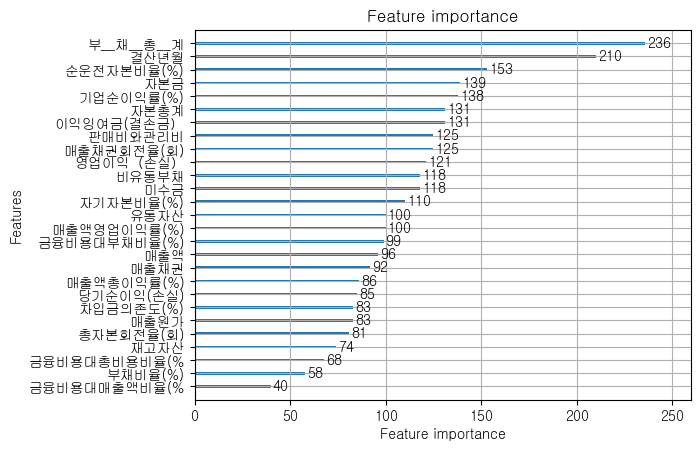

In [9]:
plot_importance(model)

In [15]:
perm = PermutationImportance(model, random_state=42).fit(train_x, train_y)
# random_stat -> 난수 생성, 일정한 비교 기준점을 잡아줌 

print(eli5.format_as_text(explain_weights.explain_permutation_importance(perm, feature_names = train_x.columns.values)))

explain_weights.explain_permutation_importance(perm, feature_names = train_x.columns.values)

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.1432 ± 0.0026  결산년월
0.0216 ± 0.0007  부  채  총  계
0.0112 ± 0.0010  이익잉여금(결손금）
0.0062 ± 0.0006  순운전자본비율(%)
0.0060 ± 0.0011  자본총계
0.0050 ± 0.0012  판매비와관리비
0.0048 ± 0.0005  기업순이익률(%)
0.0046 ± 0.0004  유동자산
0.0042 ± 0.0007  자본금
0.0041 ± 0.0007  매출액
0.0040 ± 0.0004  비유동부채
0.0040 ± 0.0002  매출채권회전율(회)
0.0038 ± 0.0002  미수금
0.0038 ± 0.0005  영업이익（손실）
0.0036 ± 0.0008  총자본회전율(회)
0.0032 ± 0.0006  금융비용대부채비율(%)
0.0031 ± 0.0003  당기순이익(손실)
0.0029 ± 0.0007  재고자산
0.0027 ± 0.0006  자기자본비율(%)
0.0024 ± 0.0005  매출원가
         … 7 more …          


Weight,Feature
0.1432 ± 0.0026,결산년월
0.0216 ± 0.0007,부 채 총 계
0.0112 ± 0.0010,이익잉여금(결손금）
0.0062 ± 0.0006,순운전자본비율(%)
0.0060 ± 0.0011,자본총계
0.0050 ± 0.0012,판매비와관리비
0.0048 ± 0.0005,기업순이익률(%)
0.0046 ± 0.0004,유동자산
0.0042 ± 0.0007,자본금
0.0041 ± 0.0007,매출액


In [14]:
train_x.columns.values

array(['결산년월', '금융비용대매출액비율(%', '금융비용대부채비율(%)', '금융비용대총비용비율(%',
       '기업순이익률(%)', '당기순이익(손실)', '매출액', '매출액영업이익률(%)', '매출액총이익률(%)',
       '매출원가', '매출채권', '매출채권회전율(회)', '미수금', '부  채  총  계', '부채비율(%)',
       '비유동부채', '순운전자본비율(%)', '영업이익（손실）', '유동자산', '이익잉여금(결손금）',
       '자기자본비율(%)', '자본금', '자본총계', '재고자산', '차입금의존도(%)', '총자본회전율(회)',
       '판매비와관리비'], dtype=object)